In [1]:
import sys
sys.path.append(r'../')
from hao.ViT import ViT
import hao.utils as u
from data.data_ISIC import ISICDataModule

In [2]:
img_size, patch_size, batch_size = 224, 16, 128
num_workers = 4
max_epochs = 15
use_bias = False
restart_train = False
gpu_idx = 0
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 256, 512, 4, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.0001
last_model_path = r'ViT_pth/last_model.pth'
best_model_path = r'ViT_pth/best_model.pth'
image_dir=r"C:\Users\HaoXL\Music\ISIC\2018\Training_Data\ISIC2018_Task3_Training_Input"
label_file=r"C:\Users\HaoXL\Music\ISIC\2018\Training Ground Truth\ISIC2018_Task3_Training_GroundTruth\ISIC2018_Task3_Training_GroundTruth.csv"
categories = [
    'Melanoma',
    'Melanocytic Nevus',
    'Basal Cell Carcinoma',
    'Actinic Keratoses and Intraepithelial Carcinoma', 
    'Benign Keratosis',
    'Dermatofibroma',
    'Vascular Lesions'
]
texts = [f'a photo of skin lesions of {c}' for c in categories]
num_classes = len(categories)


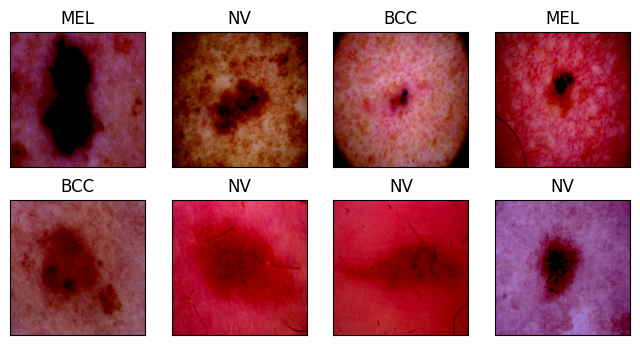

In [3]:
data = ISICDataModule(image_dir, label_file, batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

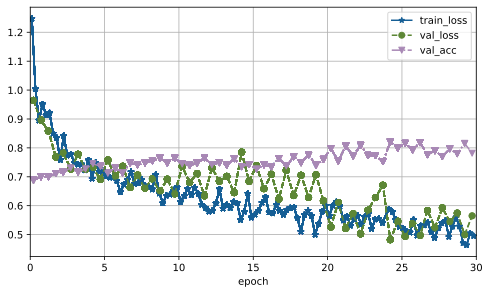

In [4]:
model = ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

In [5]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.0183 val loss 0.9303 val acc 69.41%
Epoch 2 : train loss 0.8699 val loss 0.8136 val acc 70.58%
Epoch 3 : train loss 0.7860 val loss 0.7549 val acc 72.37%
Epoch 4 : train loss 0.7390 val loss 0.7515 val acc 72.20%
Epoch 5 : train loss 0.7211 val loss 0.7119 val acc 74.06%
Epoch 6 : train loss 0.6963 val loss 0.7299 val acc 72.08%
Epoch 7 : train loss 0.6842 val loss 0.6997 val acc 73.10%
Epoch 8 : train loss 0.6740 val loss 0.6835 val acc 74.44%
Epoch 9 : train loss 0.6583 val loss 0.6717 val acc 76.01%
Epoch 10: train loss 0.6440 val loss 0.6663 val acc 75.62%
Epoch 11: train loss 0.6357 val loss 0.7082 val acc 74.18%
Epoch 12: train loss 0.6218 val loss 0.6727 val acc 75.61%
Epoch 13: train loss 0.6041 val loss 0.7077 val acc 74.52%
Epoch 14: train loss 0.6040 val loss 0.6733 val acc 75.15%
Epoch 15: train loss 0.5846 val loss 0.7347 val acc 73.89%
Epoch 16: train loss 0.6004 val loss 0.6990 val acc 73.47%
Epoch 17: train loss 0.5842 val loss 0.6658 val acc 74.8